<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Мы фиксируем сиды для воспроизводимости результатов выполнения кода

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print("Пропуски в колонках:")
columns_with_missing

Пропуски в колонках:


mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [4]:
duplicates = df_train.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 985


In [5]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(df_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы на основании профайлинга:
- В данных есть пропуски (1.1%) и дублированные строки(7%) перед дальнейшим анализом нужно заполнить/выкинуть пропуски и выкинуть дубликаты
- В данных 4 численных, 5 текстовых и 4 категориальных признака
- Есть большая отрицательная корреляция между selling_price и km_driven, year и km_driven
- Есть большая положительная корреляция между transmission и selling_price, year и selling_price


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [6]:
numerical = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical = df_train.select_dtypes(include=['object']).columns
print(f'Числовые признаки: {numerical.values}')
print(f'Категорицальные признаки: {categorical.values}')


Числовые признаки: ['year' 'selling_price' 'km_driven' 'seats']
Категорицальные признаки: ['name' 'fuel' 'seller_type' 'transmission' 'owner' 'mileage' 'engine'
 'max_power' 'torque']


In [7]:
print("Основные статистики по числовым признакам для train:\n", df_train[numerical].describe())
print("-"*60)
print("Основные статистики по числовым признакам для test:\n", df_test[numerical].describe())

Основные статистики по числовым признакам для train:
               year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
------------------------------------------------------------
Основные статистики по числовым признакам для test:
               year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    13

Мы видим, что по всем признакам медианы примерно равны, наибольшее отличие у selling_price и km_driven. Среднее для year, seat почти одинаковые, в то время как для selling_price и km_driven одинакового порядка, но отличается как и медиана. Поскольку распределение не сильно отличается, то обобщающая способность модели должна распространяться и на тестовую выборку.

In [8]:
print("Основные статистики по категориальные признакам для train:\n", df_train[categorical].describe())
print("-"*80)
print("Основные статистики по категориальные признакам для test:\n", df_test[categorical].describe())

Основные статистики по категориальные признакам для train:
                           name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  
--------------------------------------------------------------------------------
Основные статистики по категориальные признакам для test:
                        name    fuel seller_type transmission        owner  \
count                  1000    1000        1000

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [9]:
columns_to_process = list(df_train.drop(columns=["selling_price"]).columns.values)
columns_to_process

['name',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [10]:
duplicates = df_train[df_train.duplicated(subset=columns_to_process)]
print("Количество дубликатов:", duplicates.shape[0])

Количество дубликатов: 1159


In [11]:
print("Дубликаты: \n", duplicates)

Дубликаты: 
                                           name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First

In [12]:
df_train = df_train.drop_duplicates(subset=columns_to_process, keep='first').reset_index(drop=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [13]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [14]:
def process_mileage(pair: str):
    try:
        value, measure = pair.split()
    except:
        return None
    value = float(value)
    if measure == "km/kg":
        value *= 1.4
    return value

df_train["mileage"] = df_train["mileage"].apply(process_mileage)
df_test["mileage"] = df_test["mileage"].apply(process_mileage)

In [15]:
df_train["engine"] = df_train["engine"].str.rstrip(" C").astype(float)
df_test["engine"] = df_test["engine"].str.rstrip(" C").astype(float)

In [16]:
def process_max_power(pair: str):
    try:
        value, measure = pair.split()
    except:
        return None
    value = float(value)
    return value

df_train["max_power"] = df_train["max_power"].apply(process_max_power)
df_test["max_power"] = df_test["max_power"].apply(process_max_power)

In [17]:
import re

def extract_max_torque(pair: str):
    try:
        match = re.findall(r'\d+', pair)
    except:
        return None
    
    if match and len(match) > 1:
        return int(match[-1])
    else:
        return None


df_train["max_torque"] = df_train["torque"].apply(extract_max_torque)
df_test["max_torque"] = df_test["torque"].apply(extract_max_torque)

In [18]:
def extract_torque(pair: str):
    try:
        match = re.findall(r'\d+', pair)
    except:
        return None

    if match:
        value = float(match[0])
        if "kgm" in pair.lower():
            value *= 9.8
        return value
    else:
        return None

df_train["torque"] = df_train["torque"].apply(extract_torque)
df_test["torque"] = df_test["torque"].apply(extract_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






- Медиана более устойчива к выбросам, чем среднее, поэтому мы заполняем пропуски ею
- Мы считаем отдельно медиану train, так как мы не можем использовать информацию из тестовых данных при обработке обучающей выборке. При пропусках в тестовых данных мы также используем статистики из train, так как там может просто не быть своих статистик(не можем посчитать только по 1 семплу например) и чтобы не сдвигать распределения

In [19]:
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]

for column in columns_with_missing.index:
    df_train[column] = df_train[column].fillna(df_train[column].median())
    df_test[column] = df_test[column].fillna(df_train[column].median())

In [20]:
assert (df_train.isna().sum() == 0).all()
assert (df_test.isna().sum() == 0).all()

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [21]:
df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)
df_train["engine"] = df_train["seats"].astype(int)
df_test["engine"] = df_test["seats"].astype(int)

Мы можем рассматривать seats как категориальную из-за того, что количество мест имеет ограниченное и маленькое число различных значений(обычно 3 или 5). 

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [22]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.547135     5.426712   
std       4.095622   5.354320e+05  6.007114e+04     4.228290     0.982344   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     2.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000     5.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.400000     5.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000     5.000000   
max    2020.000000   1.000000e+07  2.360457e+06    46.816000    14.000000   

         max_power       torque        seats   max_torque  
count  5840.000000  5840.000000  5840.000000  5840.000000  
mean     87.948422   175.583630     5.426712  2904.179452  
std      31.577884   116.782626     0.982344  1036.799439  
min      32.800000    39.200000     2.000000     0.000000  
25%      68.000000   111.000000     5.000000  2000.000000  
50%      81.860000   160.000000     5.000000  2800.000000  
75%      99.000000   200.000000     5.000000  3750.000000  
max     400.000000  3724.000000    14.000000  5300.000000

In [23]:
df_test.describe()

year  selling_price      km_driven      mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.000000   
mean   2013.681000   6.179010e+05   71393.341000    19.414176     5.403000   
std       4.012149   7.585539e+05   48486.218662     4.090353     0.912921   
min    1995.000000   3.100000e+04    1303.000000     0.000000     4.000000   
25%    2011.000000   2.500000e+05   37000.000000    16.587500     5.000000   
50%    2014.000000   4.349990e+05   61500.000000    19.400000     5.000000   
75%    2017.000000   6.700000e+05  100000.000000    22.320000     5.000000   
max    2020.000000   6.000000e+06  375000.000000    45.164000     9.000000   

         max_power       torque        seats   max_torque  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean     90.841670   177.296400     5.403000  2978.176000  
std      34.893389   103.774519     0.912921  1006.957562  
min      34.200000    48.000000     4.000000     0.000000  
25%      69.000000   110.000000     5.000000  2250.000000  
50%      82.425000   160.000000     5.000000  2800.000000  
75%     102.000000   205.000000     5.000000  4000.000000  
max     280.000000  1421.000000     9.000000  5200.000000

По сравнению с предыдущим запуском .describe() распределение конечно же поменялось. Это было до удаление дубликатов и до заполнения пропусков. При заполнении пропусков медиана не должна была поменяться(так как мы заполняли ею), а вот среднее и остальные статистики могли поменяться.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

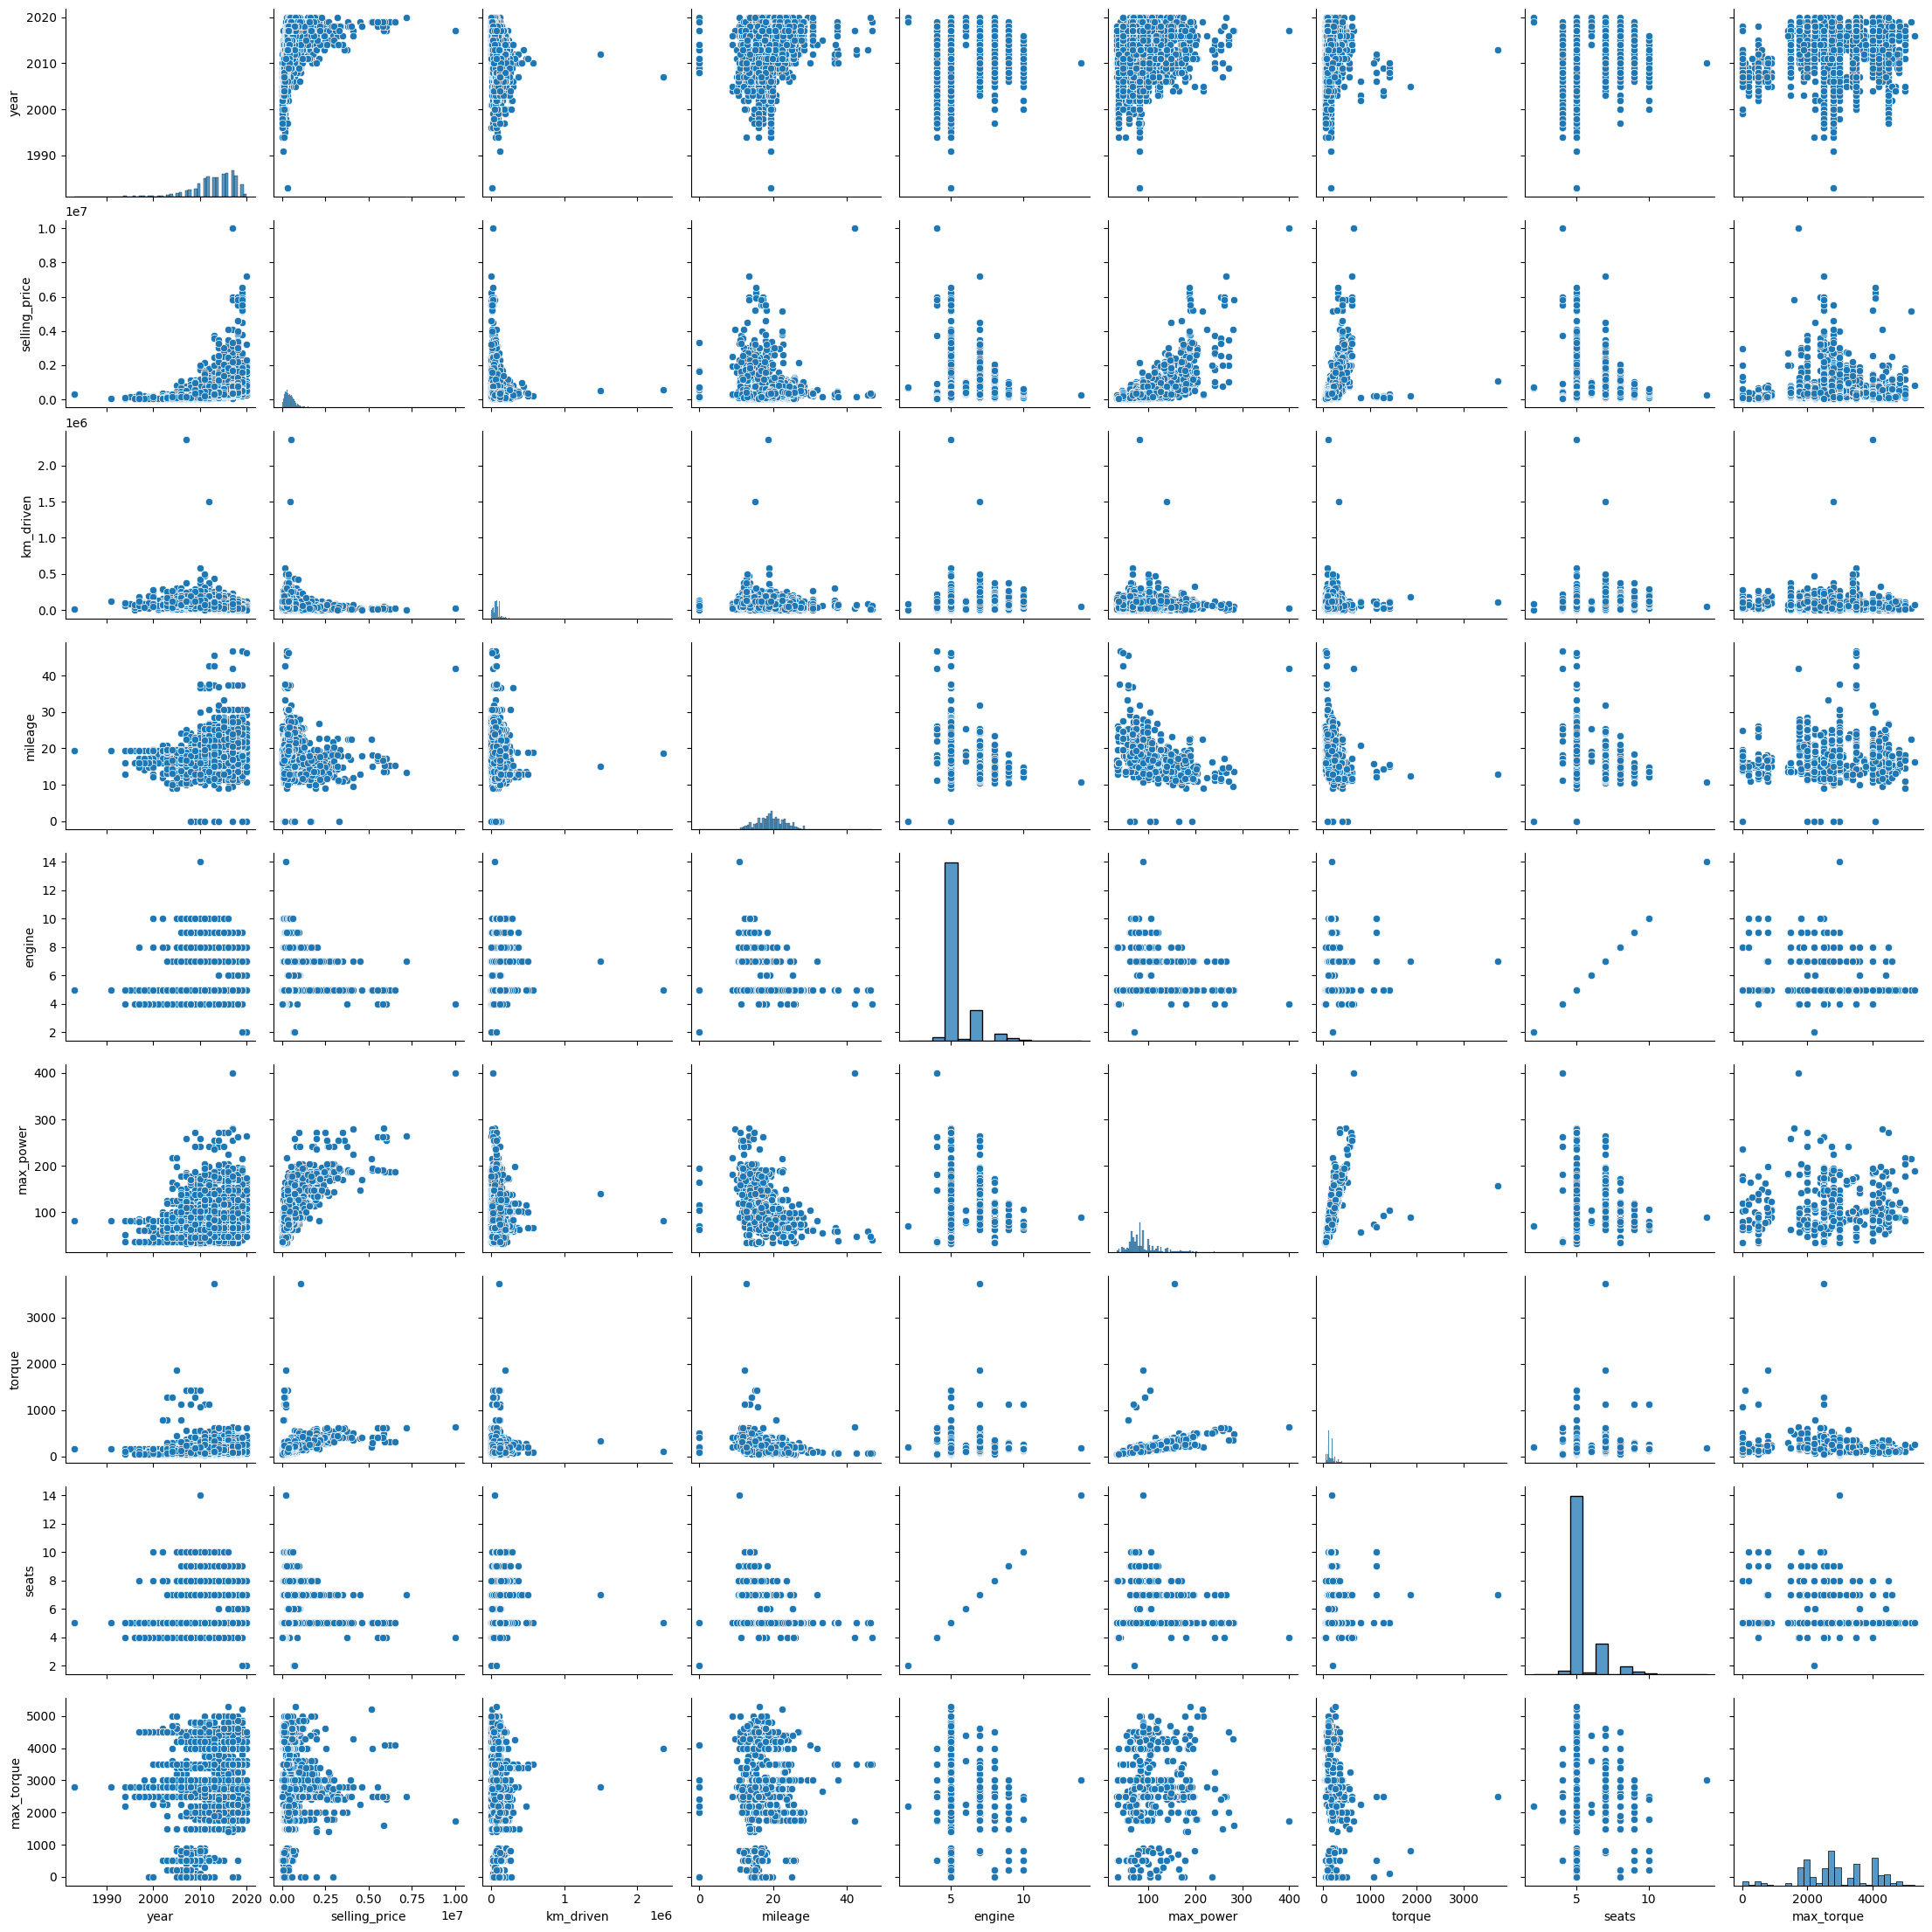

In [24]:
numerical = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical = df_train.select_dtypes(include=['object']).columns
sns.pairplot(df_train[numerical])
plt.show()

1. На основе графиков можно выдвинуть гипотезу о корреляции с целевой переменной(selling_price) признаков: year, km_driven(отрицательную корреляцию), torque, max_power
2. На основе графиков можно предположить корреляцию между парами признаков: (year, selling_price), (km_driven, selling_price), (engine, seats), (max_power, torque), (max_power, selling_price)

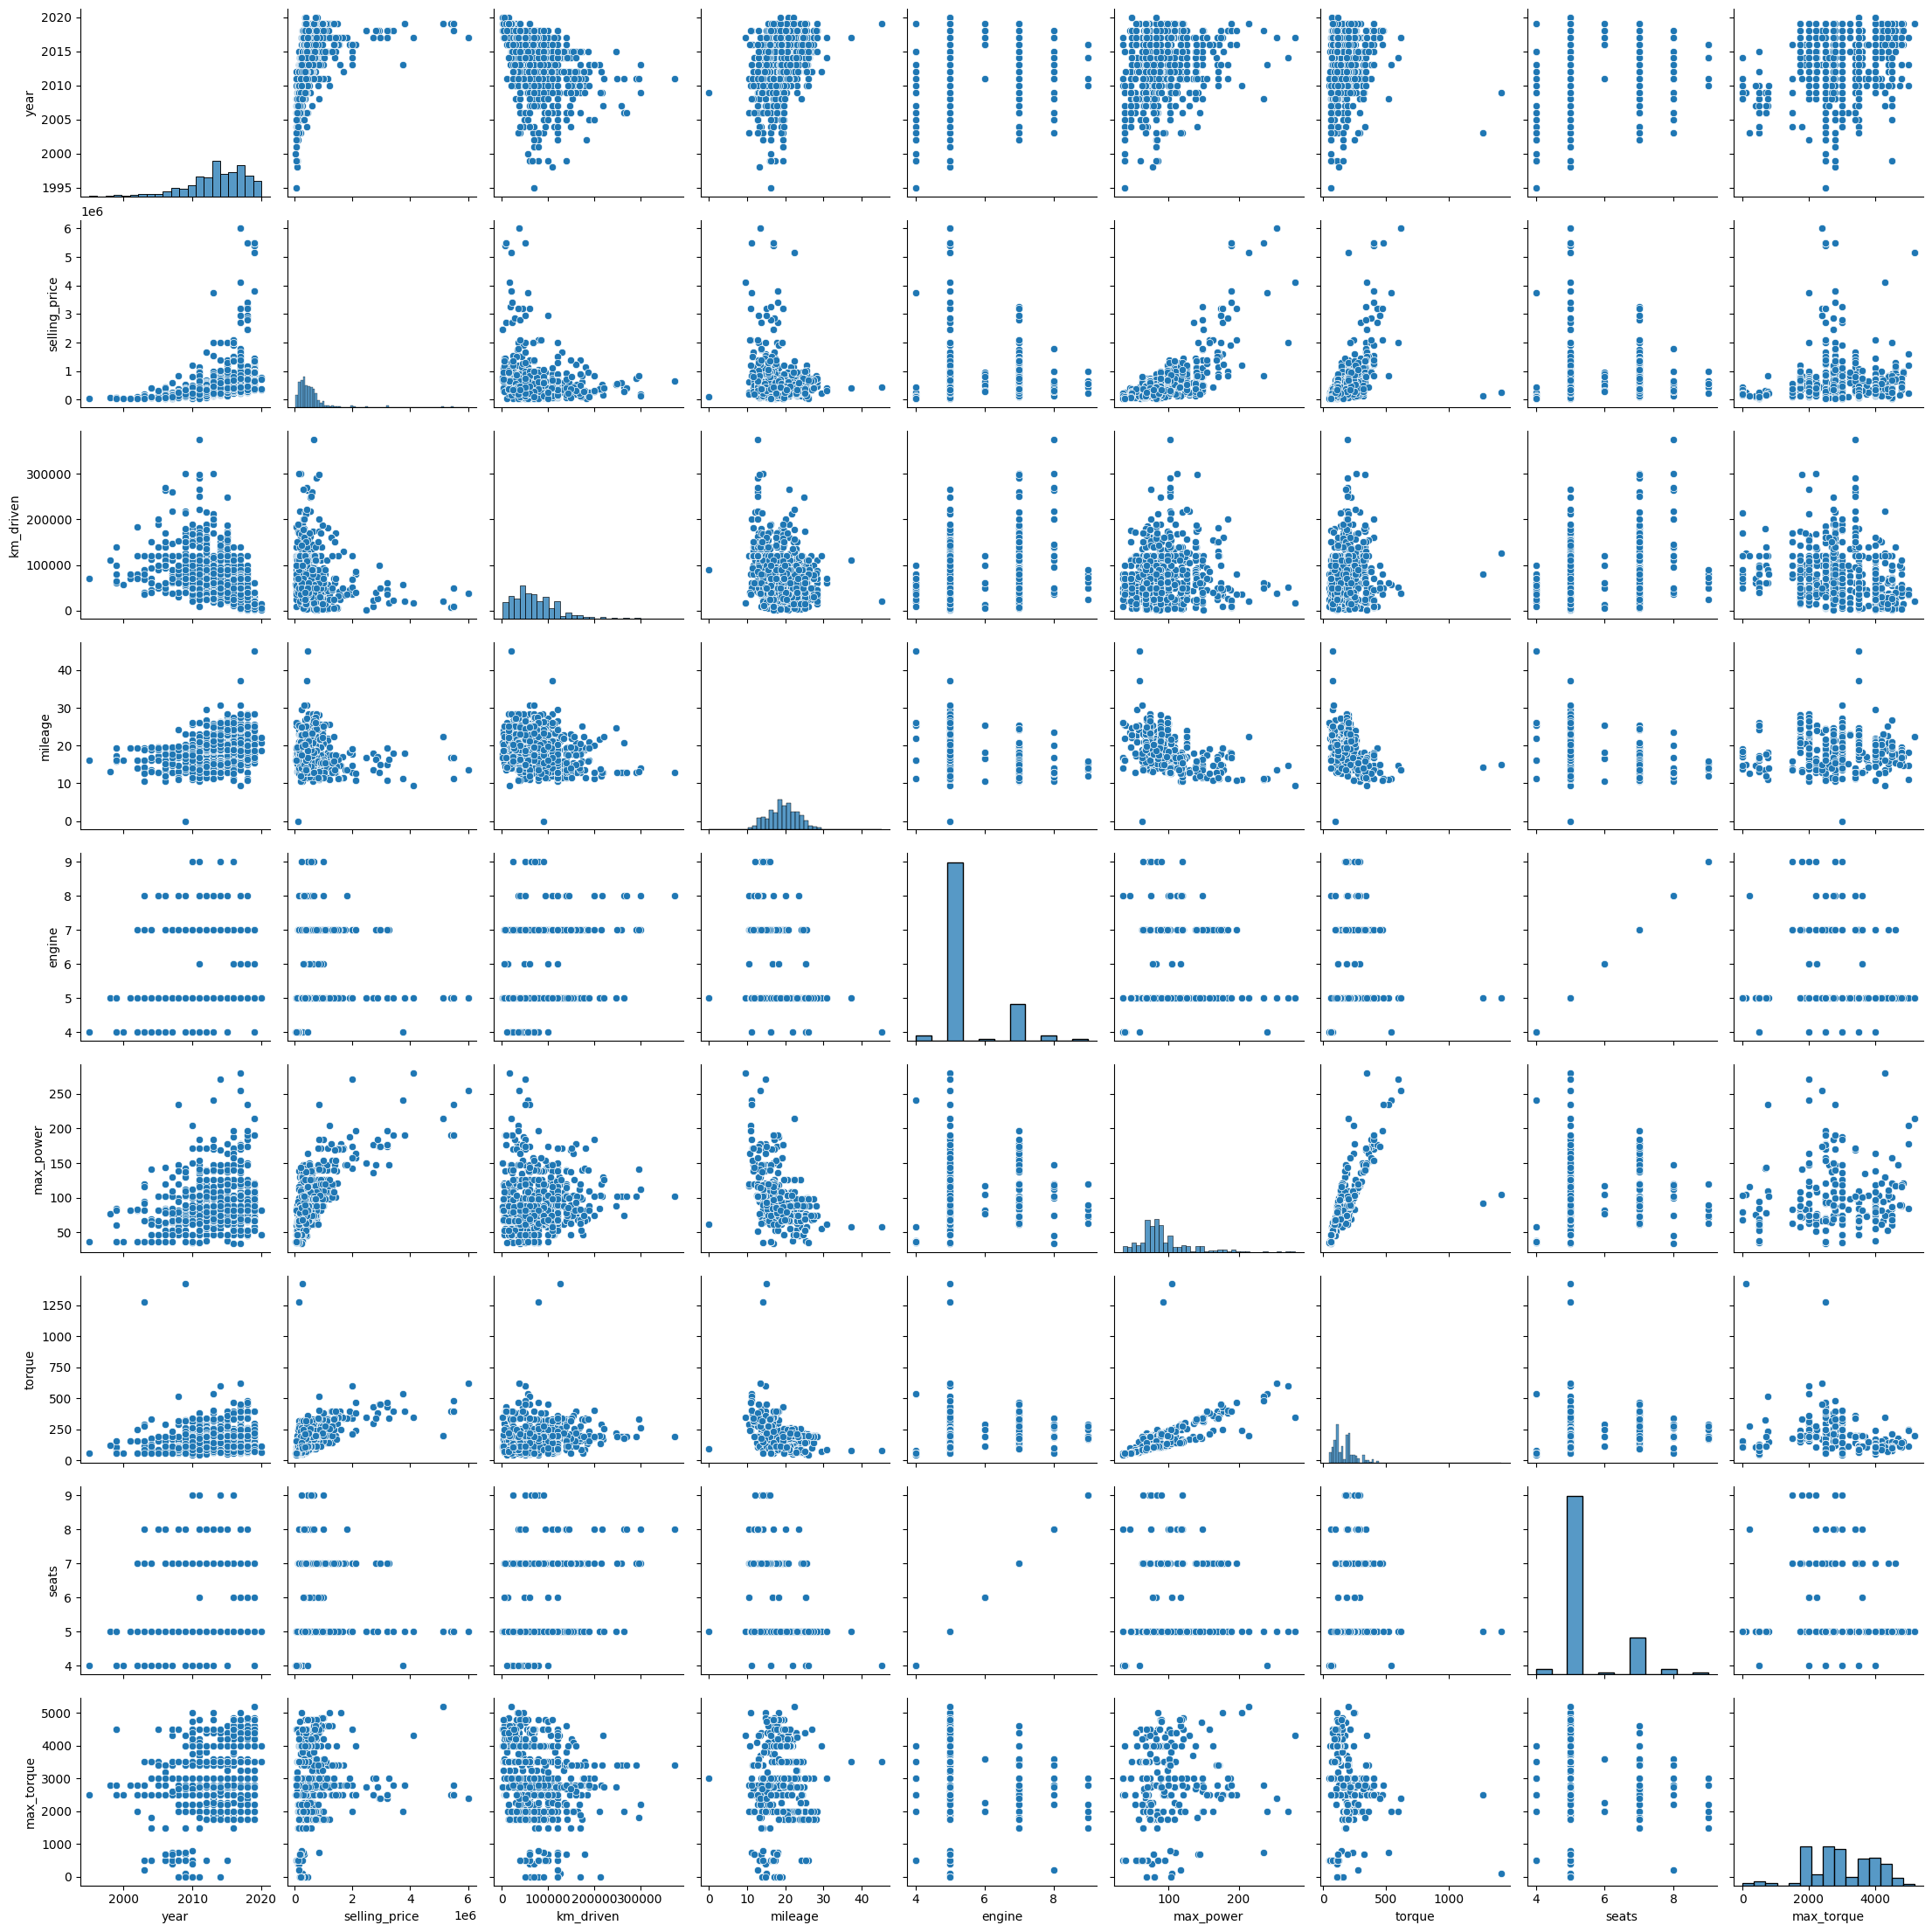

In [25]:
sns.pairplot(df_test[numerical])
plt.show()

Проблема подхода с визуальным сравнением состоит в том, что по картинке может казаться, что распределения похожи, но чтобы проверить гипотезу нужно делать дополнительные тесты. Визуально кажется, что распределения на тестовой выборке не сильно отличается

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

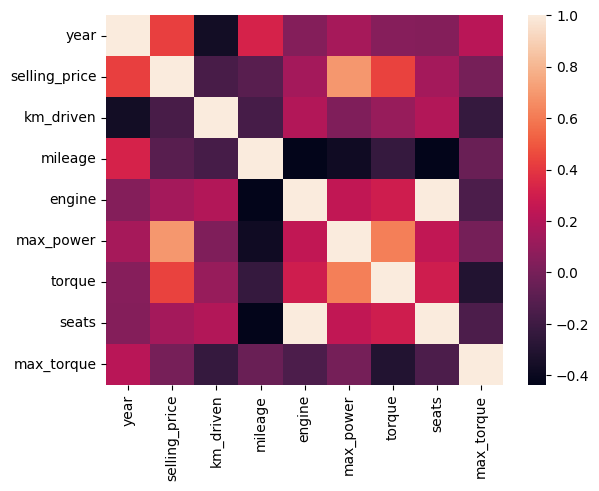

In [26]:
corr_matrix = df_train[numerical].corr()
sns.heatmap(corr_matrix)
plt.show()

In [27]:
corr_matrix.abs() == corr_matrix.abs().min().min()

year  selling_price  km_driven  mileage  engine  max_power  \
year           False          False      False    False   False      False   
selling_price  False          False      False    False   False      False   
km_driven      False          False      False    False   False      False   
mileage        False          False      False    False   False      False   
engine         False          False      False    False   False      False   
max_power      False          False      False    False   False      False   
torque         False          False      False    False   False      False   
seats          False          False      False    False   False      False   
max_torque     False           True      False    False   False      False   

               torque  seats  max_torque  
year            False  False       False  
selling_price   False  False        True  
km_driven       False  False       False  
mileage         False  False       False  
engine          False  False       False  
max_power       False  False       False  
torque          False  False       False  
seats           False  False       False  
max_torque      False  False       False

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Наименьшую корреляцию имеют признаки max_torque и selling_price
2. Пары с сильной положительной линейной зависимостью: (year, selling_price), (max_power, selling_price), (torque, selling_price), (torque, max_power)
3. Исходя из отрицательной корреляции между year и km_driven можно утверждать, что чем меньше год, тем больше километров проехала машина

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [28]:
def custom_spearman(df: pd.DataFrame, feature_x: str, feature_y: str):
    n = len(df)
    rang_x = df[feature_x].argsort().reset_index().set_index(feature_x).sort_index()["index"]
    rang_y = df[feature_y].argsort().reset_index().set_index(feature_y).sort_index()["index"]
    return float(1 - (6 * np.sum((rang_x - rang_y)**2) / (n**3 - n)))

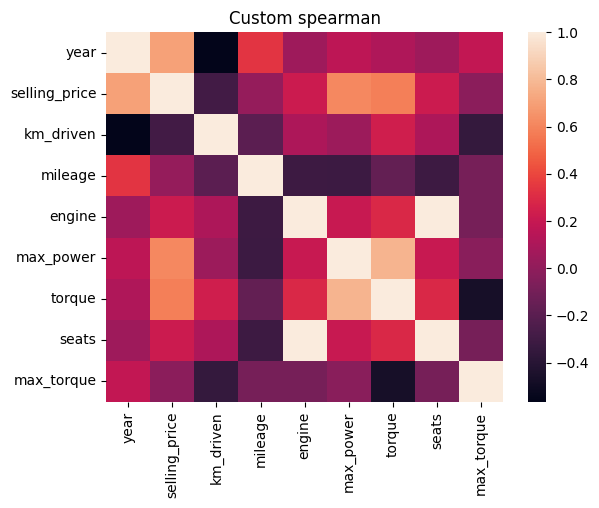

In [29]:
corr_matrix_custom_spearman = pd.DataFrame(index=df_train[numerical].columns, columns=df_train[numerical].columns, dtype=float)
for feature_x in df_train[numerical].columns:
    for feature_y in df_train[numerical].columns:
        corr_matrix_custom_spearman.loc[feature_x, feature_y] = custom_spearman(df_train[numerical], feature_x, feature_y)
corr_matrix_custom_spearman
sns.heatmap(corr_matrix_custom_spearman)
plt.title("Custom spearman")
plt.show()

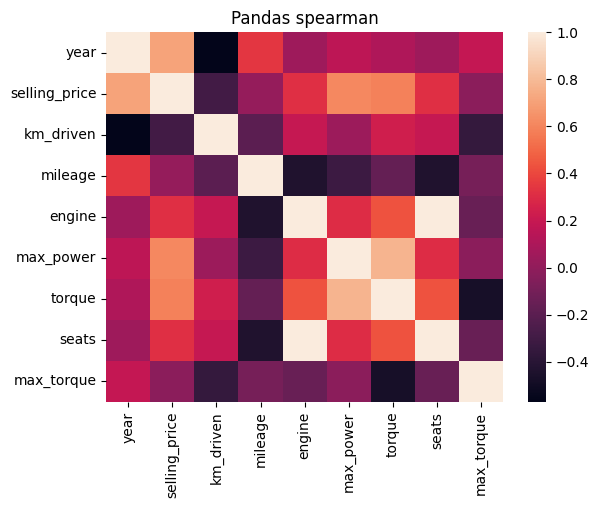

In [30]:
corr_pandas_spearman = df_train[numerical].corr(method="spearman")
sns.heatmap(corr_pandas_spearman)
plt.title("Pandas spearman")
plt.show()

Мы видим, что получились практически одинаковые матрицы корреляций

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque']


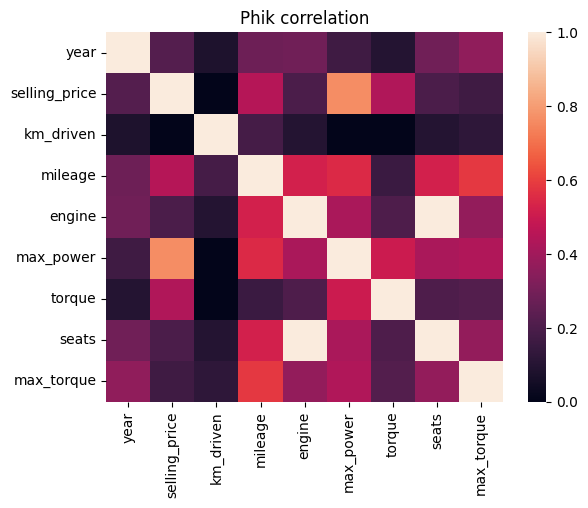

In [31]:
import phik
from phik import resources, report
sns.heatmap(df_train[numerical].phik_matrix())
plt.title("Phik correlation")
plt.show()

По матрице phik мы можем наблюдать сильную корреляцию в парах (seats, engine) и (max_power, selling_price), дяля остальных пар корреляция ниже. Корреляция (почти) нулевая в парах (torque, year), (km_driven, torque), (km_driven, max_power), (km_driven, selling_price), (km_driven, year).

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [32]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [33]:
numerical_columns = list(df_train.select_dtypes(include=['float64', 'int64']).columns)
numerical_columns.remove("seats")
numerical_columns.remove("selling_price")
numerical_columns

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque']

In [34]:
y_train = df_train["selling_price"]
X_train = df_train[numerical_columns]

In [35]:
assert X_train.shape == (5840, 7) # 7 - из-за обработки torque

In [36]:
y_test = df_test["selling_price"]
X_test = df_test[numerical_columns]

In [37]:
assert X_test.shape == (1000, 7)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [38]:
# Заведем словарь для хранения предсказаний каждой модели, это нам потом пригодится для бизнес метрик
y_train_predictions = {}
y_test_predictions = {}

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["BaseLinearRegression"] = y_train_pred
y_test_predictions["BaseLinearRegression"] = y_test_pred

Train R2 score: 0.5961051197910088
Train MSE: 115771757334.3629
Test R2 score: 0.5964684212934175
Test MSE: 231961474542.40604


Можем наблюдать, что ошибка модели очень большая. Правда мы не нормализовывали данные, поэтому пока сложно говорить о порядке. По R2 проще в данном случае определить, что качество модели плохое и эксперимент пока не успешен

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$R^2 = 1 - \frac{\sum_i (y^i - y_{pred}^i)^2}{\sum_i (y^i - y_{mean})^2} $, где $y_i$ - реальное значение переменной, $y_{pred}$ - предсказание модели и $y_{mean}$ - среднее значение переменной

In [40]:
def custom_r2_score(y_true, y_pred):
    y_mean = y_true.mean()
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_mean)**2)

In [41]:
assert np.allclose(r2_score(y_true=y_test, y_pred=y_test_pred), custom_r2_score(y_true=y_test, y_pred=y_test_pred))

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [42]:
def adjusted_r2(y_true, y_pred, p=14):
  ss_res = np.sum((y_true - y_pred)**2)
  ss_tot = np.sum((y_true - np.mean(y_true))**2)
  r2 = 1 - (ss_res / ss_tot)
  n = len(y_true)
  adjusted_r_squared = 1 - (1-r2)*(n-1)/(n-p-1)
  return adjusted_r_squared

В отличии от R2, adjusted_R2 штрафует за добавление лишних предикторов. Он увеличивается только тогда, когда новый предиктор действительно улучшает модель.Когда мы сравниваем несколько моделей с разным числом признаков, adjusted_R2 позволяет выбрать модель, которая лучше обобщает данные и не переобучена.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [43]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
target_scaler = StandardScaler()
feature_scaler.fit(X_train)

X_train_scaled = feature_scaler.transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["ScaledLinearRegression"] = y_train_pred
y_test_predictions["ScaledLinearRegression"] = y_test_pred

Train R2 score: 0.5961051197910052
Train MSE: 115771757334.36389
Test R2 score: 0.5964684212934108
Test MSE: 231961474542.4099


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [44]:
print("Наиболее информативный признак:", numerical_columns[np.abs(model.coef_).argmax()])

Наиболее информативный признак: max_power


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [45]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["ScaledLasso"] = y_train_pred
y_test_predictions["ScaledLasso"] = y_test_pred

Train R2 score: 0.5961051197692546
Train MSE: 115771757340.59846
Test R2 score: 0.5964672862490965
Test MSE: 231962126998.2937


In [46]:
model.coef_

array([165368.34139608, -43672.91442934,   6401.7774186 ,  -7945.1666323 ,
       347605.04189054,   4783.38108151, -42819.130176  ])

Модель не зануляет веса, возможно потому что коэффициент регуляризации недостаточно большой

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha':[0, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512], # коэффициент регуляризации L1
    'max_iter': [250, 500, 1000, 2000, 4000] # максимальное число итераций для обучения
}
model = Lasso()
regression = GridSearchCV(model, parameters, cv=10, scoring="r2")
regression.fit(X_train_scaled, y_train)

best_regressor = regression.best_estimator_

In [48]:
print(f"GridSearchCV обучил {len(parameters['alpha']) * len(parameters['max_iter'])} моделей")
print("Лучший коэффициент регуляризации", regression.best_params_["alpha"])
print("Коэффициенты", best_regressor.coef_, "видим, что они не занулились")

GridSearchCV обучил 60 моделей
Лучший коэффициент регуляризации 512
Коэффициенты [165032.08618893 -43258.78630771   6108.35887965  -7317.78524493
 347035.32425609   4549.44882359 -42133.67996819] видим, что они не занулились


In [49]:
y_test_pred = best_regressor.predict(X_test_scaled)
y_train_pred = best_regressor.predict(X_train_scaled)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["ScaledBestLasso"] = y_train_pred
y_test_predictions["ScaledBestLasso"] = y_test_pred

Train R2 score: 0.5960994932445874
Train MSE: 115773370118.2798
Test R2 score: 0.5958953190980738
Test MSE: 232290910049.58865


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [50]:
from sklearn.linear_model import ElasticNet

parameters = {
    'alpha':[0, 0.5, 1, 2, 4], # коэффициент регуляризации
    'l1_ratio': [0, 1/4, 1/2, 3/4, 1], # параметр смешивания L1 и L2
    'max_iter': [250, 500, 1000, 2000, 4000] # максимальное число итераций обучения
}

model = ElasticNet()
regression = GridSearchCV(model, parameters, cv=10, scoring="r2")
regression.fit(X_train_scaled, y_train)
best_regressor = regression.best_estimator_

In [51]:
print(f"GridSearchCV обучил {len(parameters['alpha']) * len(parameters['l1_ratio']) * len(parameters['max_iter'])} моделей")
print("Лучшие параметры", regression.best_params_)

GridSearchCV обучил 125 моделей
Лучшие параметры {'alpha': 0.5, 'l1_ratio': 0.75, 'max_iter': 250}


In [52]:
y_test_pred = best_regressor.predict(X_test_scaled)
y_train_pred = best_regressor.predict(X_train_scaled)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["ScaledBestElasticNet"] = y_train_pred
y_test_predictions["ScaledBestElasticNet"] = y_test_pred

Train R2 score: 0.588218578920941
Train MSE: 118032342304.75069
Test R2 score: 0.5668054546869747
Test MSE: 249012594792.73895


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [53]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Оставим только название марки автомобиля

In [54]:
df_train["name"] = df_train["name"].str.split().apply(lambda x: x[0])
df_test["name"] = df_test["name"].str.split().apply(lambda x: x[0])

In [55]:
df_train["name"].nunique()

30

Удалось сократить число значение стобца name до 30

In [56]:
df_train["seats"] = df_train["seats"].apply(lambda x: str(int(float(x)))).astype('category')
df_test["seats"] = df_test["seats"].apply(lambda x: str(int(float(x)))).astype('category')

numerical_columns = list(df_train.select_dtypes(include=['float64', 'int64']).columns)
numerical_columns.remove("selling_price")
categorical_columns = list(df_train.select_dtypes(include=['object', 'category']).columns)

X_train_cat = df_train[numerical_columns + categorical_columns].copy(deep=True)
X_test_cat = df_test[numerical_columns + categorical_columns].copy(deep=True)
for feature in categorical_columns:
    X_train_cat[feature] = X_train_cat[feature].astype('category')
    X_test_cat[feature] = X_test_cat[feature].astype('category')

In [57]:
assert X_train_cat.shape == (5840, 13)

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore"), categorical_columns)])

preprocessor.fit(X_train_cat)
X_train_preprocessed = preprocessor.transform(X_train_cat)
X_test_preprocessed = preprocessor.transform(X_test_cat)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- При OHE мы выбираем категориальные столбцы(те, которые не имеют естественного порядку и имеют небольшое число возможных значений). Для каждого уникального значения категориального признака создается новый бинарный признак. Значение этого признака равно 1, если объект принадлежит к данной категории, и 0 в противном случае. После преобразования исходный столбец удаляется
- При применении OHE возникает проблема мультиколлинеарности: сумма новых бинарных признаков для одного объекта всегда равна 1. Это означает, что один из этих признаков является линейной комбинацией остальных. Чтобы избежать проблем с оценкой модели, обычно удаляют один из столбцов.
- Не всегда: признак может не содержать важной информации, а может перекрываться остальными признаками, так что такую гипотезу нужно проверять прежде чем избавляться от признаков

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0, 0.5, 1, 2, 4]}
model = Ridge()
regression = GridSearchCV(model, parameters, cv=10, scoring="r2")
regression.fit(X_train_preprocessed, y_train)
best_regressor = regression.best_estimator_

y_train_pred = best_regressor.predict(X_train_preprocessed)
y_test_pred = best_regressor.predict(X_test_preprocessed)
print(f"Train R2 score: {r2_score(y_true=y_train, y_pred=y_train_pred)}")
print(f"Train MSE: {MSE(y_true=y_train, y_pred=y_train_pred)}")
print(f"Test R2 score: {r2_score(y_true=y_test, y_pred=y_test_pred)}")
print(f"Test MSE: {MSE(y_true=y_test, y_pred=y_test_pred)}")

y_train_predictions["BestRidge"] = y_train_pred
y_test_predictions["BestRidge"] = y_test_pred

Train R2 score: 0.7676700382269781
Train MSE: 66594674193.37029
Test R2 score: 0.773853229463072
Test MSE: 129995621470.04106


Удалось сильно улучшить качество, при это не переобучив модель, сохраним нынешний пайплайн препроцессинга и модель в файл

In [60]:
import pickle

info_to_save = {
    "preprocessor": preprocessor,
    "model": best_regressor,
}

with open("models.pkl", "wb") as file:
    pickle.dump(info_to_save, file)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [61]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [62]:
def business_metrics(y_true, y_pred):
    return np.mean((y_true * 0.9 <= y_pred) & (y_pred <= y_true * 1.1))

business_metrics(y_train, y_train_pred)

0.27243150684931505

In [63]:
for exp in y_train_predictions.keys():
    print(f"For model {exp} train score is {business_metrics(y_train, y_train_predictions[exp])}")
    print(f"For model {exp} test score is {business_metrics(y_test, y_test_predictions[exp])}")

For model BaseLinearRegression train score is 0.22003424657534246
For model BaseLinearRegression test score is 0.236
For model ScaledLinearRegression train score is 0.22003424657534246
For model ScaledLinearRegression test score is 0.236
For model ScaledLasso train score is 0.22003424657534246
For model ScaledLasso test score is 0.236
For model ScaledBestLasso train score is 0.22003424657534246
For model ScaledBestLasso test score is 0.232
For model ScaledBestElasticNet train score is 0.22482876712328767
For model ScaledBestElasticNet test score is 0.25
For model BestRidge train score is 0.27243150684931505
For model BestRidge test score is 0.313


Лучшая модель последняя - Ridge

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [64]:
def custom_business_metrics(y_true, y_pred, alpha = 2):
    errors = y_pred - y_true
    negarive_mask = (errors < 0)
    return np.mean(errors**2 * (1 - negarive_mask) + alpha * errors**2 * negarive_mask) / 1e8 #чтобы снизить порядок ошибки

In [65]:
for exp in y_train_predictions.keys():
    print(f"For model {exp} train score is {custom_business_metrics(y_train, y_train_predictions[exp])}")
    print(f"For model {exp} test score is {custom_business_metrics(y_test, y_test_predictions[exp])}")

For model BaseLinearRegression train score is 2015.1352749845444
For model BaseLinearRegression test score is 4369.905023188614
For model ScaledLinearRegression train score is 2015.1352749845908
For model ScaledLinearRegression test score is 4369.905023188715
For model ScaledLasso train score is 2015.1365945391267
For model ScaledLasso test score is 4369.919220491123
For model ScaledBestLasso train score is 2015.8184243346213
For model ScaledBestLasso test score is 4377.0557098078625
For model ScaledBestElasticNet train score is 2097.684303157752
For model ScaledBestElasticNet test score is 4750.713077866915
For model BestRidge train score is 1091.9788862923438
For model BestRidge test score is 2341.481766823434


Снова лучшая модель последняя - Ridge

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

```python
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...
```

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>